**Scenario A**

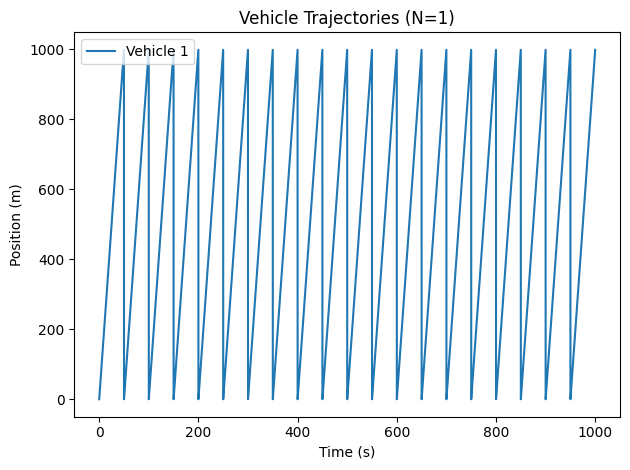

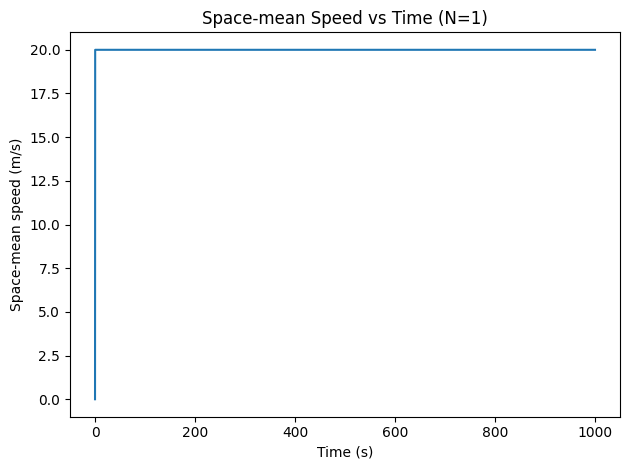

Density (veh/m)	Flow (veh/s)
0.010		0.200
0.020		0.400
0.030		0.425
0.040		0.400
0.050		0.375
0.060		0.350
0.070		0.325
0.080		0.300
0.090		0.275
0.100		0.250


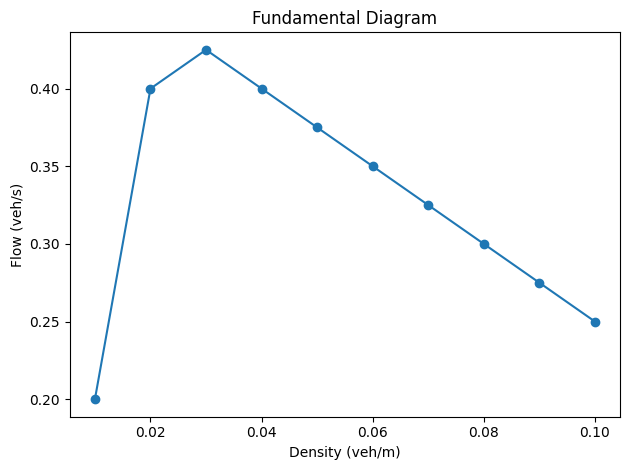

In [4]:
import numpy as np
import matplotlib.pyplot as plt


tau = 2.0         
L_vehicle = 5.0  
dt = 0.1          
v_f = 20.0        
L_road = 1000.0   
sim_time = 1000.0  
num_steps = int(sim_time / dt)

def simulate_ring(N):
    positions = np.linspace(0, L_road, N, endpoint=False)
    speeds = np.zeros(N)
    pos_history = np.zeros((num_steps, N))
    avg_speed_time = np.zeros(num_steps)

    for t in range(num_steps):
        pos_history[t] = positions
        avg_speed_time[t] = speeds.mean()

        next_pos = np.roll(positions, -1)
        gap = (next_pos - positions - L_vehicle) % L_road
        speeds = np.minimum(gap / tau, v_f)
        positions = (positions + speeds * dt) % L_road

    return pos_history, avg_speed_time

while True:
    try:
        N_sample = int(input("Enter number of vehicles (1–120): "))
        if 1 <= N_sample <= 120:
            break
        print("Please enter an integer between 1 and 120.")
    except ValueError:
        print("Invalid input. Please enter an integer.")

pos_hist, avg_speed_time = simulate_ring(N_sample)
time = np.arange(num_steps) * dt

plt.figure()
for i in range(min(5, N_sample)):
    plt.plot(time, pos_hist[:, i], label=f'Vehicle {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title(f'Vehicle Trajectories (N={N_sample})')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(time, avg_speed_time)
plt.xlabel('Time (s)')
plt.ylabel('Space‑mean speed (m/s)')
plt.title(f'Space‑mean Speed vs Time (N={N_sample})')
plt.tight_layout()
plt.show()

densities = np.linspace(0.01, 0.1, 10)
flows = []
for dens in densities:
    N_i = max(2, int(dens * L_road))
    _, avg_speed_time_i = simulate_ring(N_i)
    steady_speed = avg_speed_time_i[num_steps // 2 :].mean()
    flows.append(dens * steady_speed)

print("Density (veh/m)\tFlow (veh/s)")
for k, q in zip(densities, flows):
    print(f"{k:.3f}\t\t{q:.3f}")

plt.figure()
plt.plot(densities, flows, marker='o')
plt.xlabel('Density (veh/m)')
plt.ylabel('Flow (veh/s)')
plt.title('Fundamental Diagram')
plt.tight_layout()
plt.show()

**Scenario B**

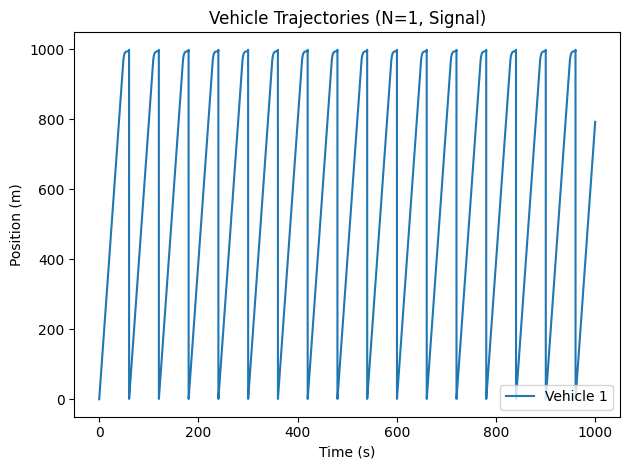

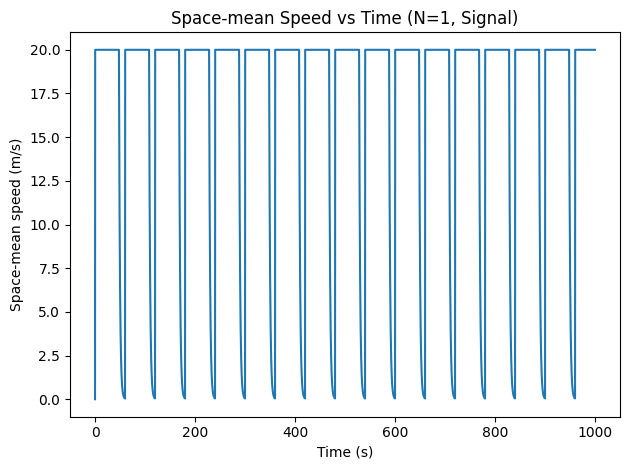


Density (veh/m)	Flow (veh/s)
0.010		0.168
0.020		0.252
0.030		0.252
0.040		0.253
0.050		0.253
0.060		0.253
0.070		0.252
0.080		0.251
0.090		0.248
0.100		0.234


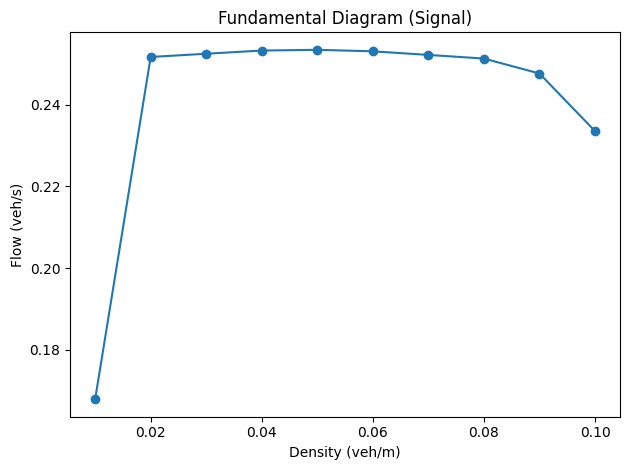

In [5]:
import numpy as np
import matplotlib.pyplot as plt


tau = 2.0         
L_vehicle = 5.0  
dt = 0.1       
v_f = 20.0        
L_road = 1000.0    
sim_time = 1000.0   
num_steps = int(sim_time / dt)

signal_pos = 0.0           
cycle_time = 60.0          
green_ratio = 0.5     

def simulate_ring_signal(N):
    positions = np.linspace(0, L_road, N, endpoint=False)
    speeds = np.zeros(N)
    pos_history = np.zeros((num_steps, N))
    avg_speed_time = np.zeros(num_steps)

    for t in range(num_steps):
        current_time = t * dt
        t_mod = current_time % cycle_time
        is_green = (t_mod < cycle_time * green_ratio)

        pos_history[t] = positions
        avg_speed_time[t] = speeds.mean()

    
        next_pos = np.roll(positions, -1)
        gap_vehicle = (next_pos - positions - L_vehicle) % L_road

    
        if not is_green:
            gap_signal = (signal_pos - positions - L_vehicle) % L_road
            effective_gap = np.minimum(gap_vehicle, gap_signal)
        else:
            effective_gap = gap_vehicle

    
        speeds = np.minimum(effective_gap / tau, v_f)
        positions = (positions + speeds * dt) % L_road

    return pos_history, avg_speed_time

while True:
    try:
        N_sample = int(input("Enter number of vehicles (1–120): "))
        if 1 <= N_sample <= 120:
            break
        print("Please enter an integer between 1 and 120.")
    except ValueError:
        print("Invalid input. Please enter an integer.")

pos_hist, avg_speed_time = simulate_ring_signal(N_sample)
time = np.arange(num_steps) * dt

plt.figure()
for i in range(min(5, N_sample)):
    plt.plot(time, pos_hist[:, i], label=f'Vehicle {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title(f'Vehicle Trajectories (N={N_sample}, Signal)')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(time, avg_speed_time)
plt.xlabel('Time (s)')
plt.ylabel('Space‑mean speed (m/s)')
plt.title(f'Space‑mean Speed vs Time (N={N_sample}, Signal)')
plt.tight_layout()
plt.show()

densities = np.linspace(0.01, 0.1, 10)
flows = []
for dens in densities:
    N_i = max(1, int(dens * L_road))
    _, avg_speed_time_i = simulate_ring_signal(N_i)
    steady_speed = avg_speed_time_i[num_steps//2:].mean()
    flows.append(dens * steady_speed)

print("\nDensity (veh/m)\tFlow (veh/s)")
for k, q in zip(densities, flows):
    print(f"{k:.3f}\t\t{q:.3f}")

plt.figure()
plt.plot(densities, flows, marker='o')
plt.xlabel('Density (veh/m)')
plt.ylabel('Flow (veh/s)')
plt.title('Fundamental Diagram (Signal)')
plt.tight_layout()
plt.show()